<a href="https://colab.research.google.com/github/anniseraa/fsd/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fertika Indri Dhamaningrum - 24523160**

**Annisa Ramadhani - 24523018**

# **1. Penjelasan Singkat Dataset**

**Dataset**: Mall Customer Segmentation

**Isi Data**: Dataset ini berisi profil dasar pelanggan (ID, Usia, Jenis Kelamin) beserta indikator ekonomi utama yaitu Annual Income (Pendapatan Tahunan) dan Spending Score (Skor Pengeluaran).

**Tujuan Analisis**: Mengelompokkan pelanggan ke dalam beberapa segmen (cluster) berdasarkan perilaku belanja dan kemampuan ekonomi mereka.

**Fitur yang Digunakan**: Analisis difokuskan pada dua variabel numerik (Annual Income dan Spending Score) untuk memetakan kepadatan persebaran pelanggan.


Dataset Head:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


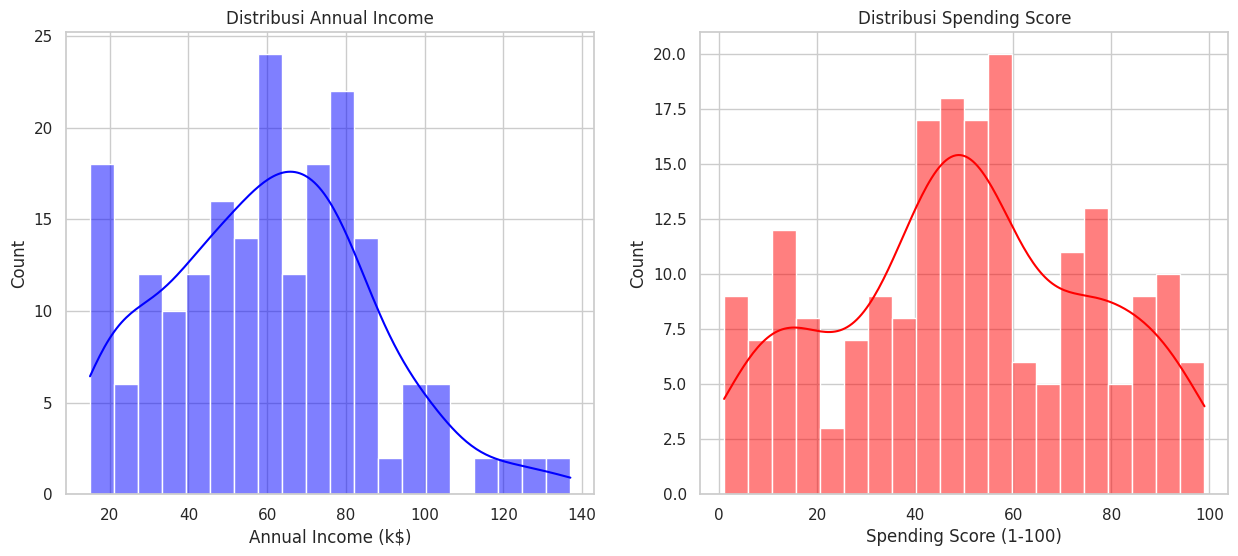

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Mengatur style plot
sns.set(style="whitegrid")

# 1. Load Dataset
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
df = pd.read_csv(url)

# Menampilkan 5 data teratas
print("Dataset Head:")
display(df.head())

# --- EDA (Exploratory Data Analysis) ---
# Mirip dengan referensi: Kita lihat sebaran Income dan Spending Score
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='blue')
plt.title('Distribusi Annual Income')

plt.subplot(1, 2, 2)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='red')
plt.title('Distribusi Spending Score')

plt.show()

# Seleksi Fitur (Kolom 3 & 4)
X = df.iloc[:, [3, 4]].values

# **2. Proses Clustering**

**a.** menggunakan **K-means**

Algoritma ini membagi data ke dalam sejumlah $K$ cluster yang sudah ditentukan di awal6. Kelemahannya adalah setiap titik data dipaksa masuk ke sebuah cluster meskipun posisinya sangat jauh (noise).

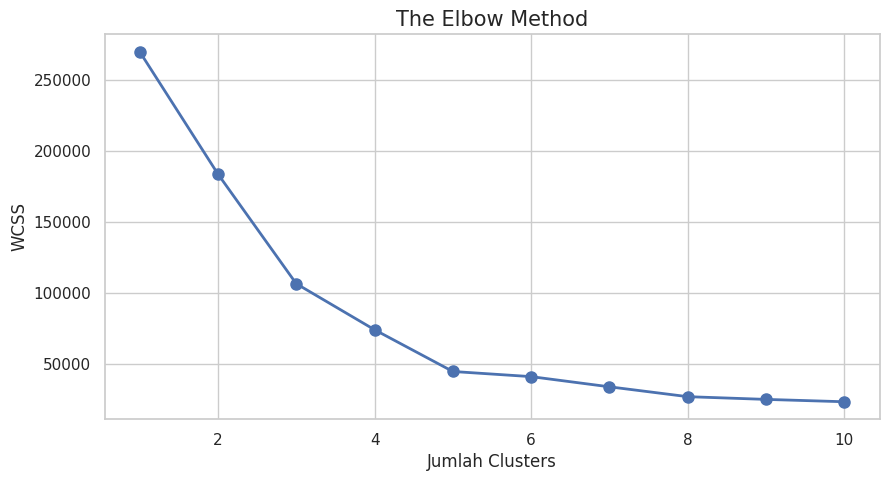

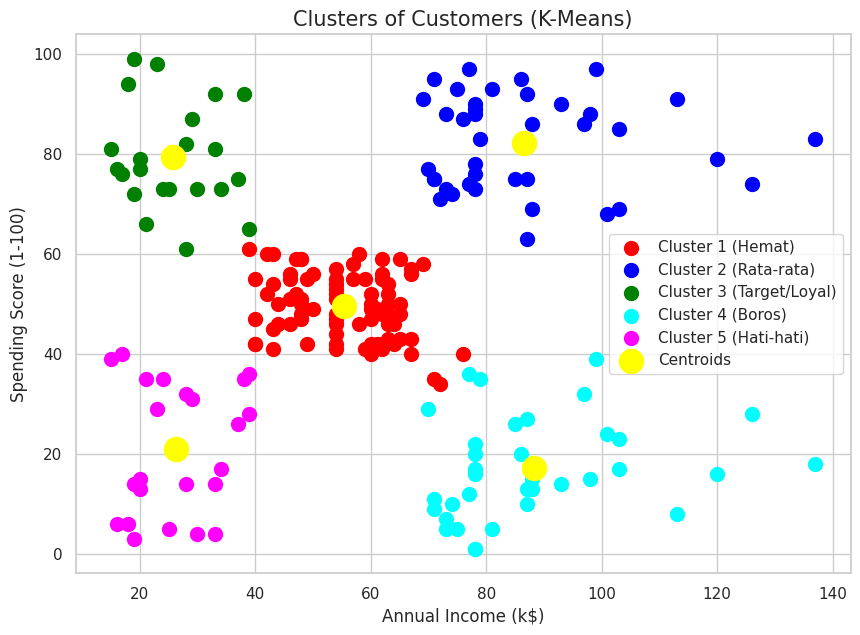

In [ ]:
# --- K-MEANS CLUSTERING ---

# 1. Menentukan K dengan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X) # Note: K-Means sklearn cukup pintar, bisa tanpa scaling utk visualisasi dasar, tapi scaling disarankan.
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linewidth=2, markersize=8)
plt.title('The Elbow Method', fontsize=15)
plt.xlabel('Jumlah Clusters')
plt.ylabel('WCSS')
plt.show()

# 2. Fit K-Means dengan k=5 (Berdasarkan Elbow)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 3. Visualisasi Hasil (Style Referensi: Titik Cluster + Centroid Besar)
plt.figure(figsize=(10, 7))
# Plot tiap cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1 (Hemat)')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2 (Rata-rata)')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3 (Target/Loyal)')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4 (Boros)')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5 (Hati-hati)')

# Plot Centroids (Titik Kuning Besar)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of Customers (K-Means)', fontsize=15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**b.** menggunakan **Hierarchical Clustering**

Algoritma ini menggunakan pendekatan Agglomerative (Ward's method) untuk membangun hierarki cluster yang digambarkan melalui dendrogram.

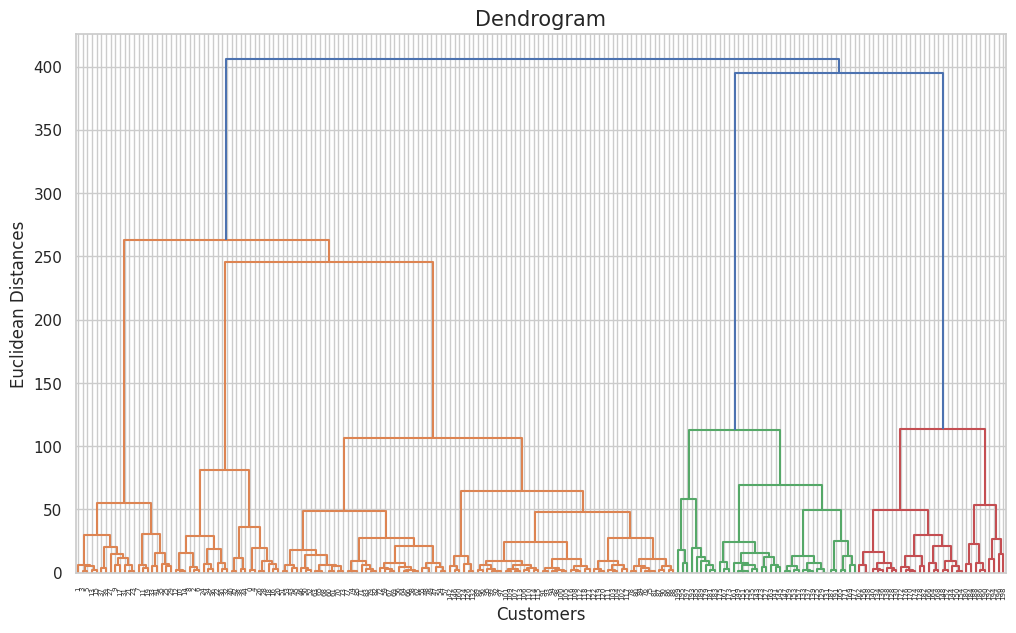

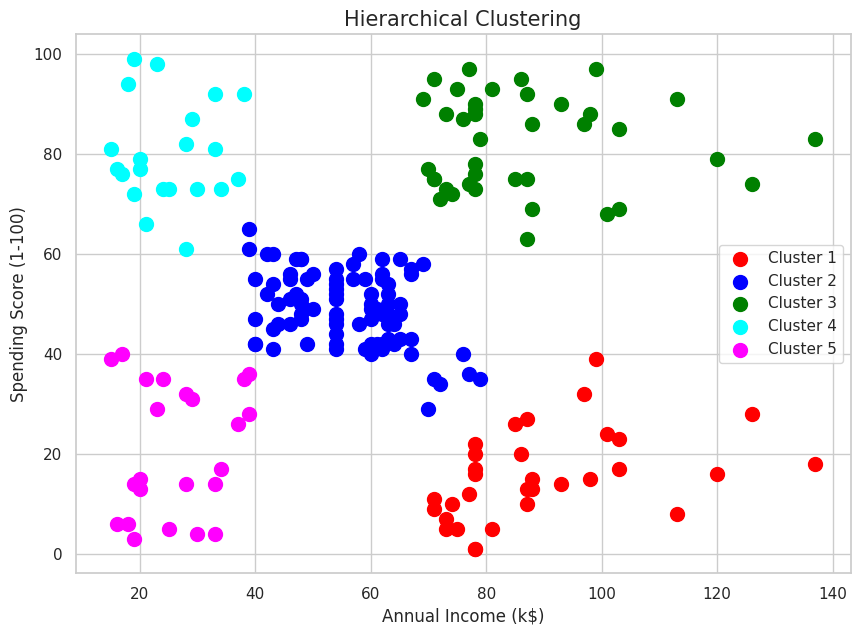

In [ ]:
# --- HIERARCHICAL CLUSTERING ---

# 1. Dendrogram
plt.figure(figsize=(12, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram', fontsize=15)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

# 2. Fit Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# 3. Visualisasi Hierarchical
plt.figure(figsize=(10, 7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Hierarchical Clustering', fontsize=15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**c.** menggunakan **DBSCAN**

Berbeda dengan K-Means, DBSCAN mengelompokkan data berdasarkan kerapatan. Ia mengidentifikasi wilayah padat sebagai cluster dan memisahkannya dari wilayah berkerapatan rendah yang dianggap sebagai noise.

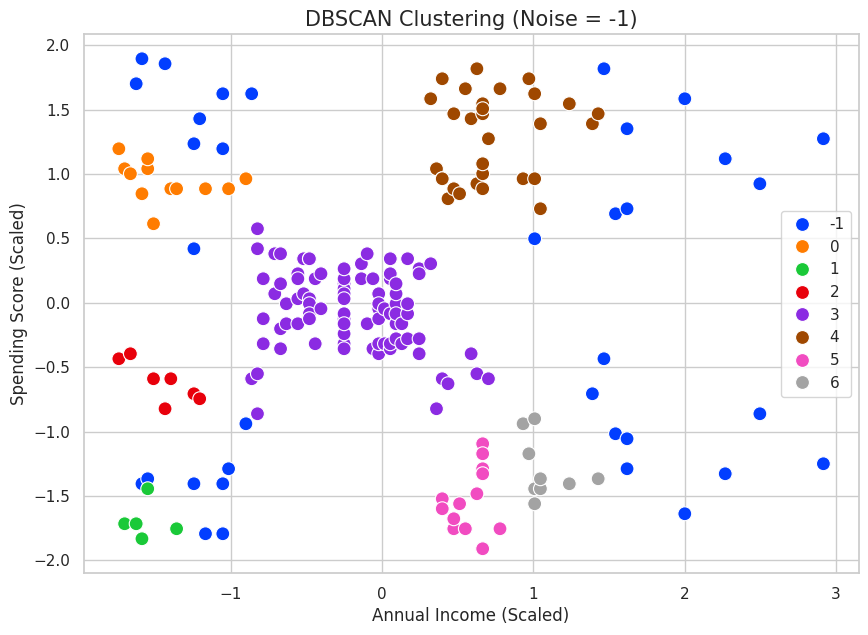

In [ ]:
# --- DBSCAN CLUSTERING ---
# Scaling data khusus untuk DBSCAN (sangat sensitif scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

# Visualisasi DBSCAN
plt.figure(figsize=(10, 7))
# Menggunakan plot scatter otomatis seaborn untuk memudahkan warna noise (-1)
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_dbscan, palette='bright', s=100)
plt.title('DBSCAN Clustering (Noise = -1)', fontsize=15)
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

# **3. Evaluasi Clustering**

**a.** mengguanakan **Elbow Method**

Elbow Method digunakan khusus untuk K-Means guna menentukan jumlah K optimal. Titik "siku" pada grafik WCSS (Within-Cluster Sum of Squares) menunjukkan jumlah cluster terbaik sebelum penambahan cluster baru tidak lagi memberikan informasi signifikan.

**b.** menggunakan **Silhouette Score**

Silhouette Score mengukur seberapa mirip sebuah objek dengan clusternya sendiri dibandingkan dengan cluster lain.

- Skor mendekati 1: Cluster terpisah dengan sangat baik.

- Skor mendekati 0: Cluster tumpang tindih.

In [ ]:
print("--- Silhouette Score Evaluation ---")
print(f'K-Means Score: {silhouette_score(X, y_kmeans):.3f}')
print(f'Hierarchical Score: {silhouette_score(X, y_hc):.3f}')
# DBSCAN pakai data scaled
if len(set(y_dbscan)) > 1:
    print(f'DBSCAN Score: {silhouette_score(X_scaled, y_dbscan):.3f}')

--- Silhouette Score Evaluation ---
K-Means Score: 0.554
Hierarchical Score: 0.553
DBSCAN Score: 0.316
